In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=Warning)

In [2]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

In [3]:
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [4]:
data['Rand'] = data['Rand 1,2,3']   

In [5]:
data.drop('Rand 1,2,3',axis=1,inplace=True)

In [6]:
data.head()

,SAT,GPA,Rand
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [7]:
data.describe()

,SAT,GPA,Rand
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [8]:
y = data['GPA']

x = data[['SAT','Rand']].assign(const=1)

In [9]:
data.head()

,SAT,GPA,Rand
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [10]:
model = sm.OLS(y,x)
result = model.fit()

In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           6.58e-10
Time:                        17:44:45   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand          -0.0083      0.027     -0.304      0.762      -0.062       0.046
const          0.2960      0.417      0.710      0.480      -0.533       1.125
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
result.fittedvalues.values

array([3.12193344, 3.0227167 , 3.18145672, 3.05744108, 3.07893924,
       3.0491776 , 3.19634071, 3.20461053, 3.24263988, 3.33027548,
       3.14011817, 3.21452966, 3.15665782, 3.10208671, 3.21122258,
       3.37492322, 3.17318901, 3.04752194, 3.31704714, 3.2244488 ,
       3.18311026, 3.11862213, 3.02106316, 3.07728781, 3.55185431,
       3.30713012, 3.24264199, 3.28232277, 3.62791723, 3.24594696,
       3.21287824, 3.48571263, 3.22279949, 3.33854319, 3.38815155,
       3.33689176, 3.26082672, 3.50224382, 3.20956693, 3.30712801,
       3.3550786 , 3.34681512, 3.52208633, 3.10209094, 3.57831097,
       3.46256094, 3.29555321, 3.52209055, 3.35838992, 3.54358237,
       3.25090547, 3.35508283, 3.43279718, 2.98138027, 3.39476783,
       3.40799617, 3.14012028, 3.51712993, 3.22445092, 3.40634051,
       3.53531889, 3.26082672, 3.40137778, 3.64610196, 3.41791742,
       3.30878155, 3.33027548, 3.47744281, 3.35673426, 3.46421236,
       3.46751945, 3.22776011, 3.55350785, 3.46917299, 3.61303

In [13]:
data['Predictions'] = result.fittedvalues

In [14]:
result.conf_int(0.05)

,0,1
SAT,0.001211,0.002096
Rand,-0.062382,0.045843
const,-0.533224,1.125289


In [15]:
data.head(5)

,SAT,GPA,Rand,Predictions
0,1714,2.40,1,3.121933
1,1664,2.52,3,3.022717
2,1760,2.54,3,3.181457
3,1685,2.74,3,3.057441
4,1693,2.83,2,3.078939


In [16]:
result.predict(([1714,2.40,1]))

array([3.11035569])

In [17]:
newdata = data.drop('Predictions',axis=1)

In [18]:
newdata

,SAT,GPA,Rand
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


# StandardScaler Technique

In [19]:
from sklearn import preprocessing

data1 = pd.DataFrame(preprocessing.StandardScaler().fit_transform(newdata),columns = newdata.columns)

data1.head()

,SAT,GPA,Rand
0,-1.263383,-3.445384,-1.246371
1,-1.744584,-3.000932,1.106330
2,-0.820678,-2.926857,1.106330
3,-1.542480,-2.186104,1.106330
4,-1.465487,-1.852765,-0.070021


In [20]:
y = data1['GPA']
x = data1[['SAT','Rand']].assign(const=1)

In [21]:
model1 = sm.OLS(y,x)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           6.58e-10
Time:                        17:44:46   Log-Likelihood:                -97.266
No. Observations:                  84   AIC:                             200.5
Df Residuals:                      81   BIC:                             207.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.6364      0.086      7.432      0.000       0.466       0.807
Rand          -0.0260      0.086     -0.304      0.762      -0.196       0.144
const       7.008e-16      0.086   8.19e-15      1.000      -0.170       0.170
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MinMaxScaler Technique

In [22]:
from sklearn import preprocessing

data2 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(newdata),columns=newdata.columns)
data2.head()

,SAT,GPA,Rand
0,0.192308,0.000000,0.0
1,0.072115,0.085106,1.0
2,0.302885,0.099291,1.0
3,0.122596,0.241135,1.0
4,0.141827,0.304965,0.5


In [23]:
y = data2['GPA']
x =data2[['SAT','Rand']].assign(const=1)

model2 = sm.OLS(y,x)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           6.58e-10
Time:                        17:44:46   Log-Likelihood:                 41.581
No. Observations:                  84   AIC:                            -77.16
Df Residuals:                      81   BIC:                            -69.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.4879      0.066      7.432      0.000       0.357       0.618
Rand          -0.0117      0.039     -0.304      0.762      -0.088       0.065
const          0.4182      0.043      9.747      0.000       0.333       0.504
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                         5.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result2.predict(([0.192308,0,1]))

array([0.51200968])

In [25]:
data2['predictions'] = result2.fittedvalues.values

In [26]:
data2

,SAT,GPA,Rand,predictions
0,0.192308,0.000000,0.0,0.512010
1,0.072115,0.085106,1.0,0.441643
2,0.302885,0.099291,1.0,0.554225
3,0.122596,0.241135,1.0,0.466270
4,0.141827,0.304965,0.5,0.481517
...,...,...,...,...
79,0.725962,0.929078,1.0,0.760624
80,0.423077,0.929078,0.0,0.624591
81,0.848558,0.943262,1.0,0.820433
82,0.788462,0.964539,0.0,0.802845


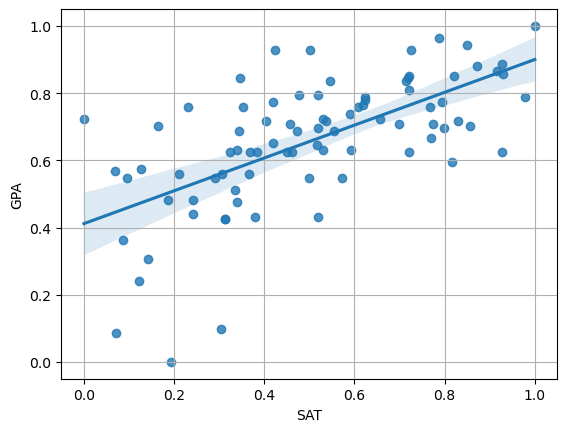

In [27]:
sns.regplot(data2['SAT'],data2['GPA'])
plt.grid()
plt.show()

In [28]:
data2.corr()

,SAT,GPA,Rand,predictions
SAT,1.000000,0.637184,-0.031722,0.999167
GPA,0.637184,1.000000,-0.046224,0.637716
Rand,-0.031722,-0.046224,1.000000,-0.072484
predictions,0.999167,0.637716,-0.072484,1.000000


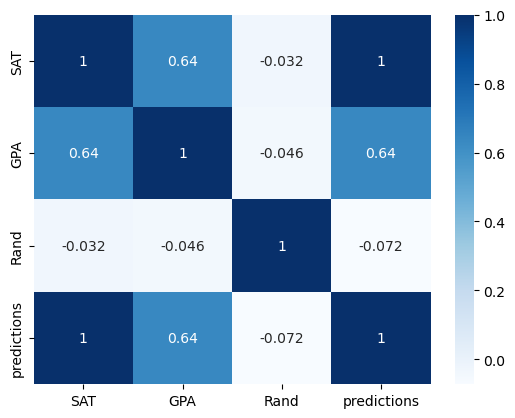

In [30]:
sns.heatmap(data2.corr(),annot=True,cbar=True,cmap='Blues');